# Simple Linear Regression


- Regression model predicts the values of a continous variable.

- A continous variable can take any numerical value within a range.

- A regression model can predict Salary, Price, Age, etc. as there are the continous variables. Based on the historical data.

- An independent variable changes independently. However, a dependent variable changes based on the change in another variable.

- Regression can predict weight based on height. 

- Regression can predict the stock price based on dollar rate.


In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np

## 2.1 Understanding The Data



In [ ]:
#importing the dataset

df = pd.read_csv('Salary_Data.csv')

In [ ]:
#checking the dataset variables
df

In [ ]:
#checking the shape of the data
print('Shape of the dataset (NO. of rows, No. of columns):', df.shape)

## 2.2 Defining Training And Test Patterns



In [ ]:
#first, defining input & output features

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

#second, checking the shape of input & output features

print('Shape of the input features:', x.shape)
print('Shape of the output features:', y.shape)


df.iloc[:, 2] selects the second column but df.iloc[:, :2] or explicitly df.iloc[:, 0:2] selects the columns until (excluding) the second column. It's the same as Python's slices. When you use a negative index, nothing changes. If you say df.iloc[:, -1] it means the last column, but df.iloc[:, :-1] means until the last column. 

https://stackoverflow.com/questions/37512079/python-pandas-why-does-df-iloc-1-values-for-my-training-data-select-till

In [ ]:
#defining the training & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 0)

#checking the shape of the training & test sets
print('Shape of the train data:', x_train.shape)
print('Shape of the test data:', y_train.shape)

In [ ]:
#to illustrate my understanding 
print(x_train, y_train, x_test, y_test)

## 2.3 Fitting The Simple Linear Regression Model

In [ ]:
#importing the required libraries

from sklearn.linear_model import LinearRegression

#defining the sample linear regression model

regressor = LinearRegression()

In [ ]:
#traaining the simple linear regression model

regressor.fit(x_train, y_train)

In [ ]:
#the regression coefficient
print('The regression coefficient:', regressor.coef_[0])

In [ ]:
#calculating the intercept
print('The intercept:', regressor.intercept_)

In [ ]:
#Calculating the fitted Linear regression line
print('The regressor line is: y = ', regressor.intercept_, '+', regressor.coef_[0], '*X')

## 2.4 Making Predictions On The Test Data



In [ ]:
#making prediction on the test data
y_pred = regressor.predict(x_test)
print(pd.DataFrame(y_pred, y_test))

In [ ]:
images = np.array(y_pred)
label = np.array(y_test)
dataset = pd.DataFrame({'Actual': label, 'Predicted': list(images)}, columns=[ 'Actual', 'Predicted'])

In [ ]:
dataset.Predicted = dataset.Predicted.round()

In [ ]:
dataset = dataset.astype({'Actual':'int64'}, {'Predicted':'int64'}) # It worked
dataset 

## 2.5 Evaluating The Prediction Performance



In [ ]:
#visualizing the fitted regression line aganist the predicted values

import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

As we can see in the above visualization, the regression line looks closer to the predicted values. Wherever we can see a distance between the line and the value, this distance is called the prediction error, or residual ().

Now let us obtain the values of other evaluation metrics including MSE, RMSE and R-Squared.

In [ ]:
#mean squared error (MSE)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)


In [ ]:
#R_squared

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)


As we can see above, the value of R-squared is very neat to 1 and that indicates this is the best fit model.

R-squared lies between 0 & 1. If it closes to 0 means poorly fitted model, and if it's closed to 1 means best fitted model.

R2 is a metric used to evaluate a linear regression model.

[R-Squared](http://localhost:8888/view/Hackthon/title.png)

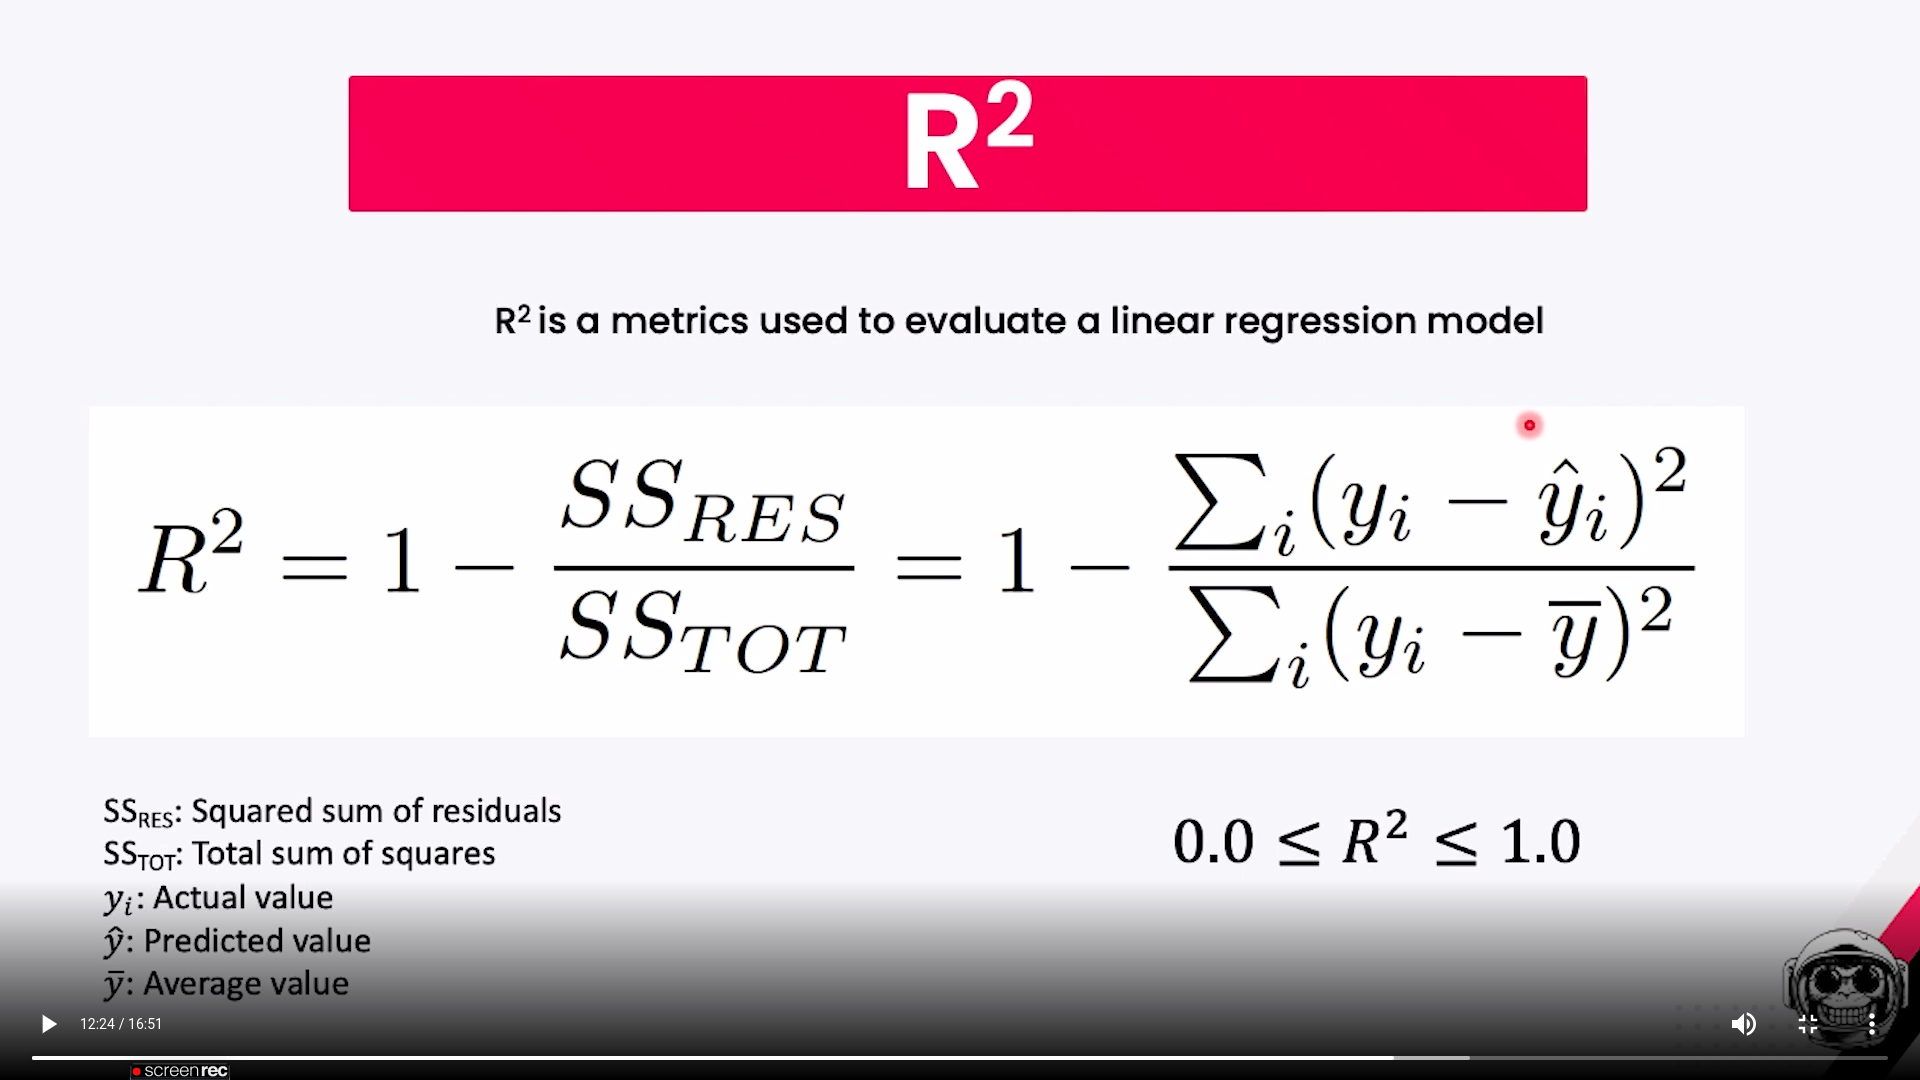

## How to insert images directly to Jupyter Notebook

https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o